In [1]:
# 1 - Kaggle Competition - House Prices

#PARTE 1: IMPORACION DE LIBRERIAS

# Escenciales
import pandas as pd
import numpy as np

# Visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# PARTE 2: LECTURA DE DATOS
total_data = pd.read_csv("train.csv", index_col=0)

In [3]:
# PARTE 3: EXPLORACION DE DATOS:
    # Gain a preliminary understanding of available data
    # Check for missing or null values
    # Find potential outliers
    # Assess correlations amongst attributes/features
    # Check for data skew
    
#a) observaciones preliminares

# vision general de la tabla
total_data.tail() 
# filas(cantidad de ejemplos) x columnas (cantidad de features)
total_data.shape # tengo 1460 ejemplos // 79 features // 1 output
# Lista de features de valor numerico
total_data.select_dtypes(exclude=['object']).columns  # nombres
len(total_data.select_dtypes(exclude='object').columns) #cantidad de features de valor numerico
total_data.select_dtypes(exclude=['object']).describe().round(decimals=2)
# Lista de features de valor categorico no numerico
total_data.select_dtypes(include=['object']).columns
len(total_data.select_dtypes(include='object').columns) #cantidad de features de valor categorico no numerico
total_data.select_dtypes(include=['object']).describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


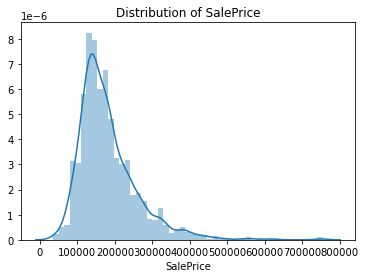

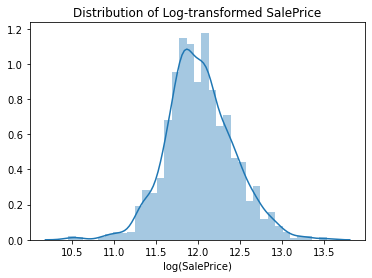

Skew in SalePrice: 1.88
Skew in logaritmo SalePrice: 0.12


In [4]:
# b) Exploracion de valores numericos
    # Corregir el skew es bueno para modelos de regresion lineal (mejorar la acc). En TREES y RF no es necesario
    
# Grafico de frecuencias, distribucion normal
y = total_data.SalePrice #output real del dataset
plt.figure()
sns.distplot(y)
plt.title('Distribution of SalePrice')
plt.show()
# Aplico logaritmo a la funcion de SalePrice vs Frecuencia
sns.distplot(np.log(y))
plt.title('Distribution of Log-transformed SalePrice')
plt.xlabel('log(SalePrice)')
plt.show() #vemos que se corrige la distrubucion y ahora el sweak da aprox cero (simetrica)

print("Skew in SalePrice: " + str(y.skew().round(decimals=2)))
print("Skew in logaritmo SalePrice: " +  str(np.log(y).skew().round(decimals=2)))

C:\Users\USUARIO\anaconda3\envs\Puente\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\USUARIO\anaconda3\envs\Puente\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\USUARIO\anaconda3\envs\Puente\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\USUARIO\anaconda3\envs\Puente\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\USUARIO\anaconda3\envs\Puente\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\USUARIO\ana

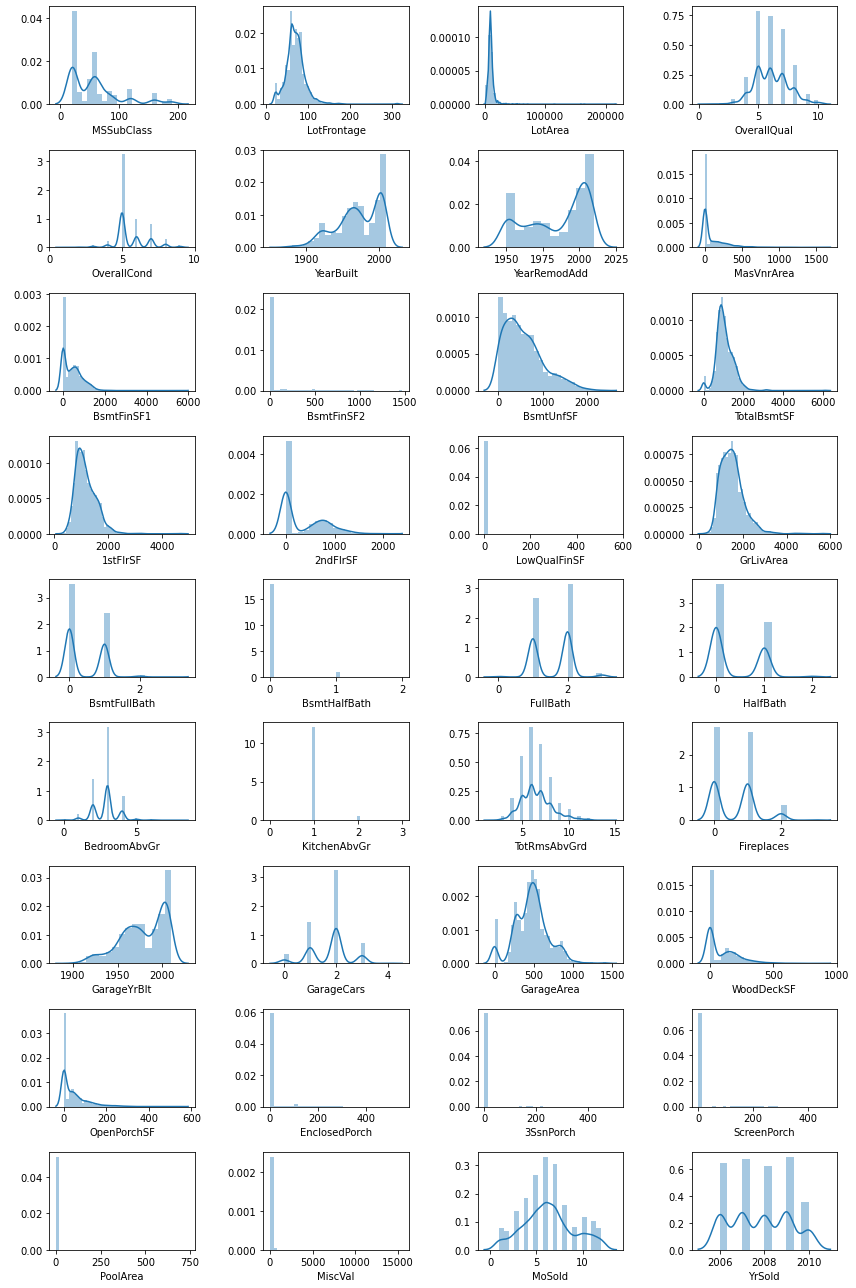

In [5]:
# Distribucion de las features

# Cantidad de features numericos
cant_features_num = total_data.select_dtypes(exclude='object').drop('SalePrice', axis=1).copy()
#
fig = plt.figure(figsize=(12,18))
for i in range(len(cant_features_num.columns)):
    fig.add_subplot(9,4,i+1) #agreo un grafico mas
    sns.distplot(cant_features_num.iloc[:,i].dropna())
    plt.xlabel(cant_features_num.columns[i])

plt.tight_layout()
plt.show() # aquellas features con distribuciones con skew no nulo deberian tranformarse a logaritmo

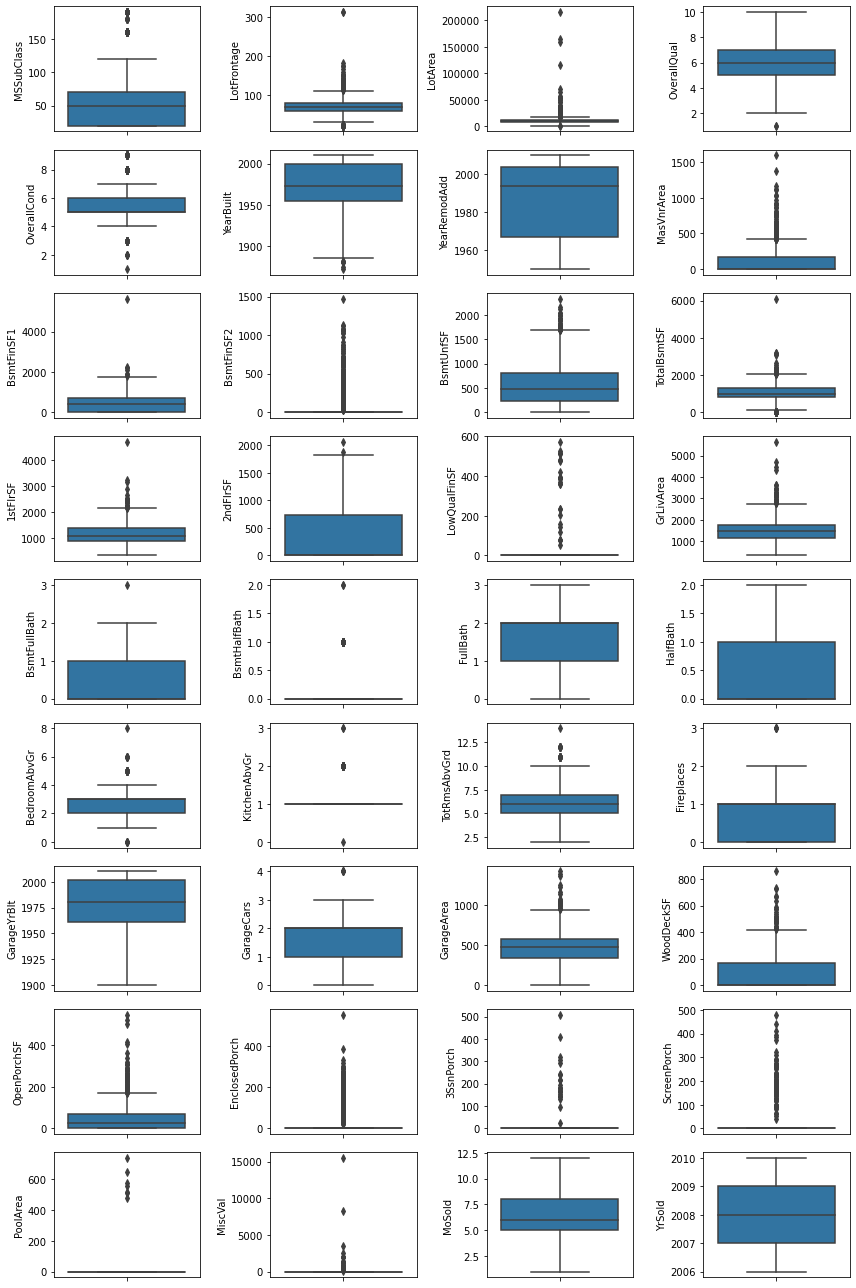

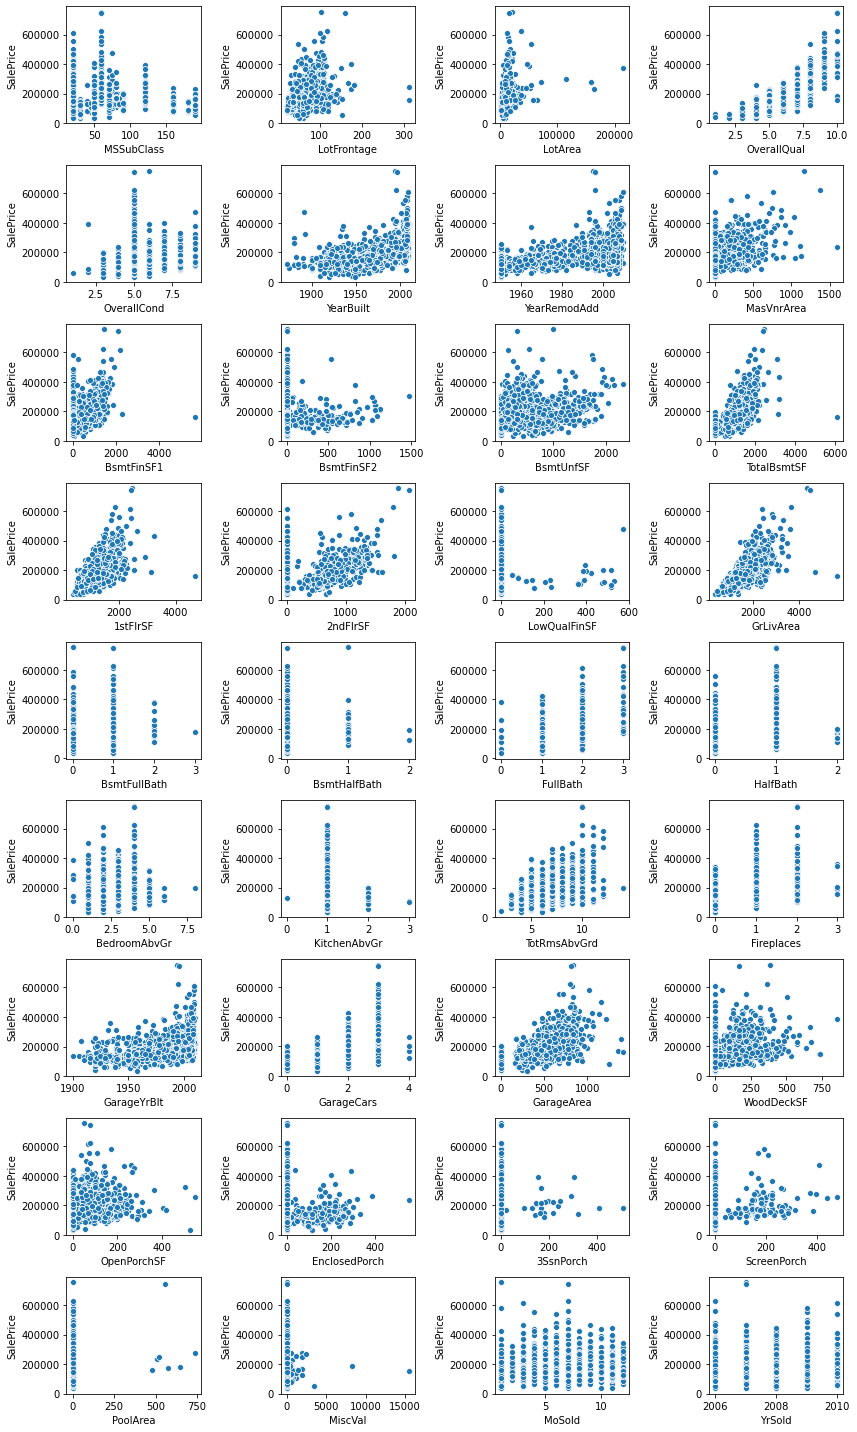

In [6]:
# Encontrando outliers

# Forma 1: analisis univariable: solo evalua la featura sola
fig = plt.figure(figsize=(12, 18))
for i in range(len(cant_features_num.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=cant_features_num.iloc[:,i])
plt.tight_layout()
plt.show()

# Forma 2: analisis bivariable: evalua la feature en funcion del precio
f = plt.figure(figsize=(12,20))
for i in range(len(cant_features_num.columns)):
    f.add_subplot(9, 4, i+1)
    sns.scatterplot(cant_features_num.iloc[:,i], y)
plt.tight_layout()
plt.show()

#Conclsuiones de los graficos y los outliers de cada feature
    #Based on a first viewing of the scatter plots against SalePrice, there appears to be:
    #A few outliers on the LotFrontage (say, >200) and LotArea (>100000) data.
    #BsmtFinSF1 (>4000) and TotalBsmtSF (>6000)
    #1stFlrSF (>4000)
    #GrLivArea (>4000 AND SalePrice <300000)
    #LowQualFinSF (>550)

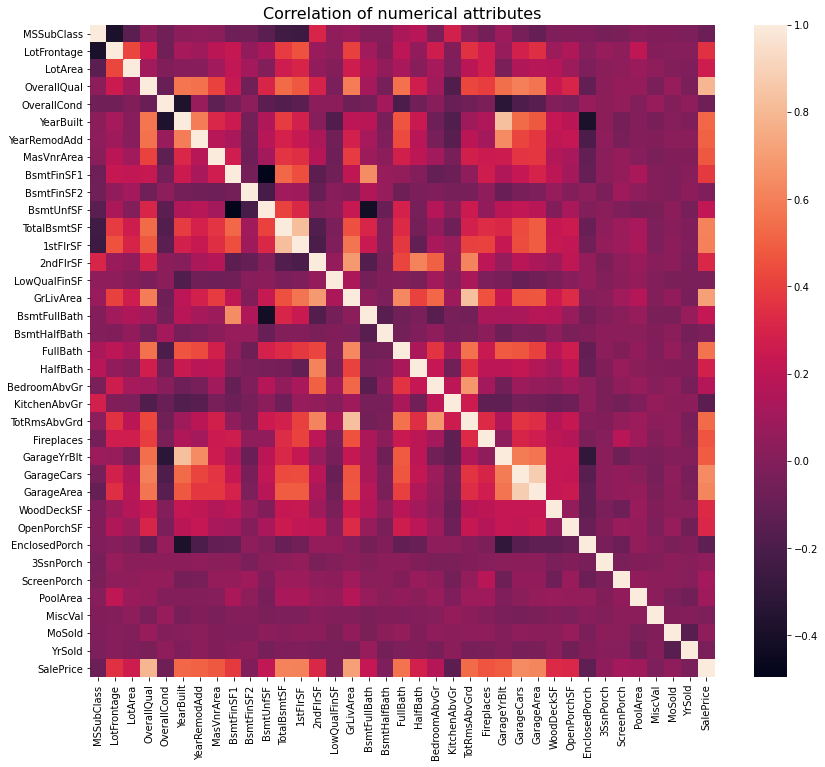

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

In [7]:
# correlacion entre las features
#gafico de correlacion
correlation = total_data.corr()
f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation)
plt.show()
#correlacion de cada feature con el SalePrice
correlation['SalePrice'].sort_values(ascending=False).head(15)

#Decicisiones
    #Aquellos features con baja correlacion con SalePrice no se consideran
    #Si tengo dos feature con alta correlacion, me quedo solo con el que tiene mas correlacion con el SalePrice
    # Excluyo GarageArea - corr 0.88 con GarageCARS - Y GarageCarrs tiene mayor corr con Price
    # Excluyo GarageYrBlt - corr 0.83 con YearBuilt - Y YearBuilt tiene mayor corr con Price
    # Excluyo todos los feature con baja corr con Price y correlacion no lineal - 
            #MSSubClass, MoSold, YrSold, MiscVal, BsmtFinSF2, BsmtUnfSF, LowQualFinSF?

In [8]:
# Valores nulos o perdidos en los features numericos

#features con mayor cantidad de valores vacios
cant_features_num.isna().sum().sort_values(ascending=False).head()

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
YrSold           0
BsmtFinSF2       0
dtype: int64

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


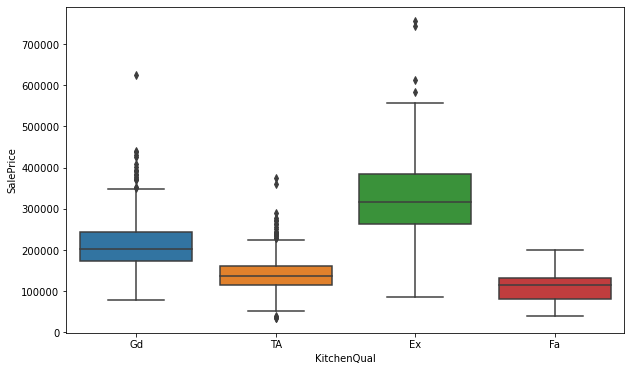

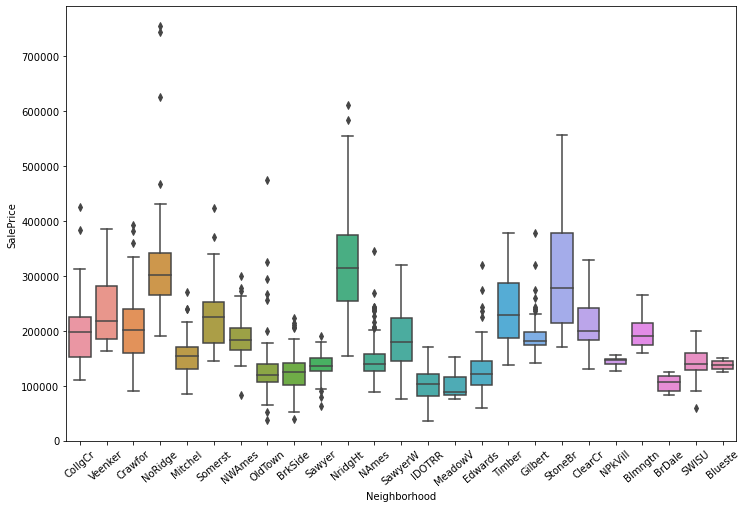

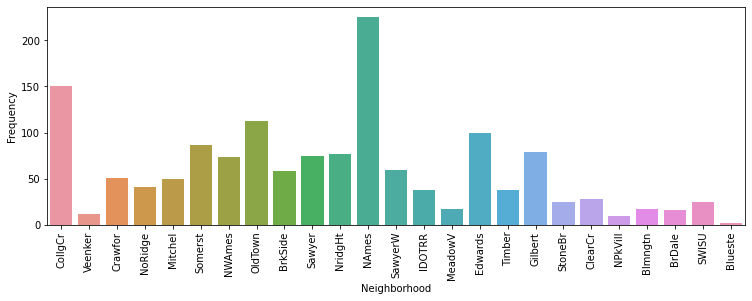

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
Condition2         0
dtype: int64

In [9]:
# c) Exploracion de valores categoricos no numericos

# Muestro todas las features con valores categoricos
cat_columns = total_data.select_dtypes(include='object').columns
print(cat_columns)

# Muestro la distribucion de algunas features
var = total_data['KitchenQual']
f, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y=total_data.SalePrice, x=var)
plt.show()

f, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y=total_data.SalePrice, x=total_data.Neighborhood)
plt.xticks(rotation=40)
plt.show()

# Cantidad de veces que aparece cada neighborhood
fig = plt.figure(figsize=(12.5,4))
sns.countplot(x='Neighborhood', data=total_data)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

# Encontrando valores vacios o nulos
total_data[cat_columns].isna().sum().sort_values(ascending=False).head(17)

In [10]:
# PARTE 4: LIMPIEZA DE DATOS Y PREPOCESAMIENTO

# a) Importo las librerias a usar
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# b) Missing values
# creo una copia del dataset
total_data_copy = total_data.copy()
# Numerical columns: lleno los vacios con ceros
total_data_copy.MasVnrArea = total_data_copy.MasVnrArea.fillna(0)
# Categorical columns: lleno los vacios con "None"
cat_cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                     'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                     'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond',
                     'MasVnrType']
for cat in cat_cols_fill_none:
    total_data_copy[cat] = total_data_copy[cat].fillna("None")

# Cuento la cantidad de NaN en cada feature    
total_data_copy.isna().sum().sort_values(ascending=False).head()

# c) Elimino los valores atipicos segun observaciones en los graficos feature vs SalePrice
total_data_copy = total_data_copy.drop(total_data_copy['LotFrontage'][total_data_copy['LotFrontage']>200].index)
total_data_copy = total_data_copy.drop(total_data_copy['LotArea'][total_data_copy['LotArea']>100000].index)
total_data_copy = total_data_copy.drop(total_data_copy['BsmtFinSF1'][total_data_copy['BsmtFinSF1']>4000].index)
total_data_copy = total_data_copy.drop(total_data_copy['TotalBsmtSF'][total_data_copy['TotalBsmtSF']>6000].index)
total_data_copy = total_data_copy.drop(total_data_copy['1stFlrSF'][total_data_copy['1stFlrSF']>4000].index)
total_data_copy = total_data_copy.drop(total_data_copy.GrLivArea[(total_data_copy['GrLivArea']>4000) & (y<300000)].index)
total_data_copy = total_data_copy.drop(total_data_copy.LowQualFinSF[total_data_copy['LowQualFinSF']>550].index)
                              
 # d) Transformo los datos para hacer su skew = 0 // cambio los valores de SalePrice por su logaritmo natural
total_data_copy['SalePrice'] = np.log(total_data_copy['SalePrice'])
total_data_copy = total_data_copy.rename(columns={'SalePrice': 'SalePrice_log'})
                                     
                     
                                     
                                      


SalePrice_log    1.000000
OverallQual      0.822207
GrLivArea        0.723015
GarageCars       0.681235
GarageArea       0.656330
TotalBsmtSF      0.647879
1stFlrSF         0.617964
YearBuilt        0.597659
FullBath         0.595027
YearRemodAdd     0.568860
GarageYrBlt      0.546928
TotRmsAbvGrd     0.535746
Fireplaces       0.486098
MasVnrArea       0.433392
BsmtFinSF1       0.391915
Name: SalePrice_log, dtype: float64


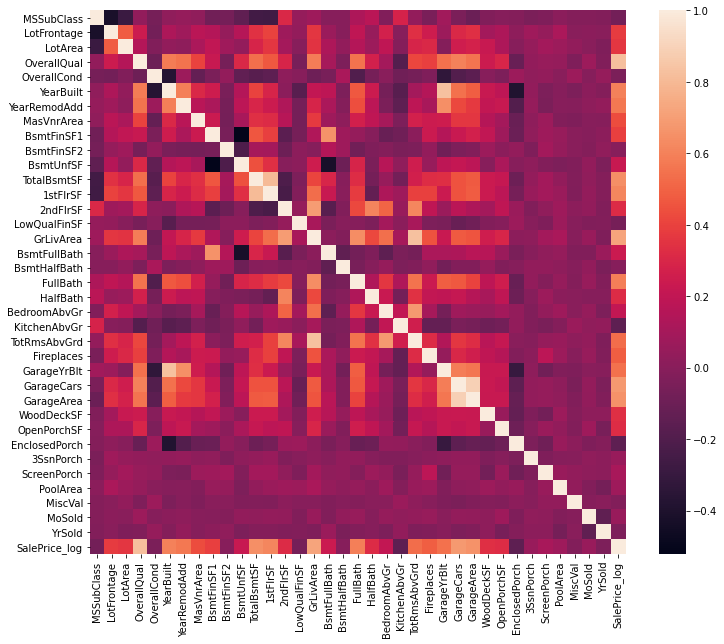

In [11]:
# PARTE 4 - FEEATURE ENGINEERING
# Usar features altamente correlacionadas entre si no es bueno para el rendimiento del algoritmo

transformed_corr = total_data_copy.corr()
plt.figure(figsize=(12,10))
sns.heatmap(transformed_corr)

#correlacion de cada feature con el log(SalePrice)
print(transformed_corr['SalePrice_log'].sort_values(ascending=False).head(15))
# Me fijo features que tengan alta correlacion (corr>0.8) y elijo la que tenga mayor corr con SalePrice_log
    #GarageCars and GarageArea (0.882)
    #YearBuilt and GarageYrBlt (0.826)
    #GrLivArea_log1p and TotRmsAbvGrd (0.826)
    #TotalBsmtSF and 1stFlrSF_log1p (0.780)



In [12]:
# Guardo en una variable todos los features/columnas a eliminar del total_dataset
attributes_drop = ['SalePrice_log', 'MiscVal', 'MSSubClass', 'MoSold', 'YrSold', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd']
# Genero los inputs y outputs corregidos
X_corregido = total_data_copy.drop(attributes_drop, axis=1)
y_corregido = total_data_copy.SalePrice_log
X_corregido = pd.get_dummies(X_corregido)

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X_corregido, y_corregido, random_state=1)
my_imputer = SimpleImputer()
train_X = my_imputer.fit_transform(train_X) 
val_X = my_imputer.transform(val_X) 


In [13]:
# PARTE 5 - PASOS PREVIOS AL ALGORITMO

# a) Importo machine learning modules

from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Modelos a analizar para despues elegir uno:
    # 1. DecisionTreeRegressor()
    # 2. RandomForestRegressor()
    # 3. XGBRegressor()
    # 4. LinearRegression()
    # 5. Lasso()
    # 6. Ridge()
    # 7. ElasticNet()
    # 8. KNeighborsRegressor()
    # 9. GradientBoostingRegressor()
    # 10. AdaBoostRegressor()
    # 11. SVR()     // suppor vector regressor

    # genero una funcion para llevar el logaritmo al valor original 
def ExpFunction(en_logaritmo):
    return np.exp(en_logaritmo)

# Creo una serie para despues ir cotejando los MAE de cada modelo usado
errores_modelos = pd.Series()
errores_modelos.index.name = 'Algorithm'


C:\Users\USUARIO\anaconda3\envs\Puente\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [14]:
# 1. DecisionTreeRegressor()

# Guardo el modelo en una variable
modelo1_tree = DecisionTreeRegressor(random_state=1)
# Entreno el modelo
modelo1_tree.fit(train_X, train_y)
# Hago predicciones de validacion 
val_prediccion1_tree = modelo1_tree.predict(val_X)
# Calculo el error MAE de validacion
mae1_tree = mean_absolute_error(np.exp(val_prediccion1_tree), np.exp(val_y))
#Guardo el error en la Serie
errores_modelos['DecisionTree'] = mae1_tree

# Modelo de DecisionTreeRegressor() usando el mejor valor de leaf
#Genero una funcion que calcule el error MAE dado el dataset train y val 
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(np.exp(val_y), np.exp(preds_val))
    return mae
                              
#Genero un loop que calcule el error MAE para distintas profundidades de arbol (cantidad de nodos en la ultima hoja)
errors = {}
for max_leaf_nodes in range(10,200): #a mayor leaf, mayor profundidad (funcion exponencial 2^x)
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    errors.update({f"{max_leaf_nodes}":my_mae})
    #print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))
#viendo el output, vemos que 500 leaf da el menor error (y no 5000, como podria pensarse)
size_with_min_error = min(errors, key=errors.get)
#print(size_with_min_error)
# Recalculo el error con el valor de leaf = 155
modelo1_tree = DecisionTreeRegressor(max_leaf_nodes=90, random_state=1)
modelo1_tree.fit(train_X, train_y)
val_prediccion1_tree = modelo1_tree.predict(val_X)
mae1_tree = mean_absolute_error(np.exp(val_prediccion1_tree), np.exp(val_y))
errores_modelos['DecisionTree_opt_max_leaf_nodes'] = mae1_tree


In [15]:





print(errores_modelos)


Algorithm
DecisionTree                       23224.986226
DecisionTree_opt_max_leaf_nodes    23162.483068
dtype: float64


In [16]:
# 2. RandomForestRegressor()
rf_model = RandomForestRegressor(random_state=5)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(np.exp(rf_val_predictions), np.exp(val_y))
errores_modelos['RandomForest'] = rf_val_mae

In [17]:
# 3. Xgboost()
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model.fit(train_X, train_y, early_stopping_rounds=5, eval_set=[(val_X,val_y)], verbose=False)
xgb_val_predictions = xgb_model.predict(val_X)
xgb_val_mae = mean_absolute_error(np.exp(xgb_val_predictions), np.exp(val_y))
errores_modelos['XGBoost'] = xgb_val_mae

[17:58:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [18]:
# 4. Regresion lineal
linear_model = LinearRegression()
linear_model.fit(train_X, train_y)
linear_val_predictions = linear_model.predict(val_X)
linear_val_mae = mean_absolute_error(np.exp(linear_val_predictions), np.exp(val_y))
errores_modelos['LinearRegression'] = linear_val_mae

In [19]:
# 5. Lasso
lasso_model = Lasso(alpha=0.0005, random_state=5)
lasso_model.fit(train_X, train_y)
lasso_val_predictions = lasso_model.predict(val_X)
lasso_val_mae = mean_absolute_error(np.exp(lasso_val_predictions), np.exp(val_y))
errores_modelos['Lasso'] = lasso_val_mae

In [20]:
# 6. Ridge
ridge_model = Ridge(alpha=0.002, random_state=5)
ridge_model.fit(train_X, train_y)
ridge_val_predictions = ridge_model.predict(val_X)
ridge_val_mae = mean_absolute_error(np.exp(ridge_val_predictions), np.exp(val_y))
errores_modelos['Ridge'] = ridge_val_mae


In [21]:
# 7. Elastic net
elastic_net_model = ElasticNet(alpha=0.02, random_state=5, l1_ratio=0.7)
elastic_net_model.fit(train_X, train_y)
elastic_net_val_predictions = elastic_net_model.predict(val_X)
elastic_net_val_mae = mean_absolute_error(np.exp(elastic_net_val_predictions), np.exp(val_y))
errores_modelos['ElasticNet'] = elastic_net_val_mae

In [22]:
# 8. K Neighbors
knn_model = KNeighborsRegressor()
knn_model.fit(train_X, train_y)
knn_val_predictions = knn_model.predict(val_X)
knn_val_mae = mean_absolute_error(np.exp(knn_val_predictions), np.exp(val_y))
errores_modelos['KNN'] = knn_val_mae

In [23]:
# 9. Gradient model
gbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=5)
gbr_model.fit(train_X, train_y) 
gbr_val_predictions = gbr_model.predict(val_X)
gbr_val_mae = mean_absolute_error(np.exp(gbr_val_predictions), np.exp(val_y))
errores_modelos['GradientBoosting'] = gbr_val_mae


In [24]:
# 10. AdaBoostRegressor
ada_model = AdaBoostRegressor(n_estimators=300, learning_rate=0.05, random_state=5)
ada_model.fit(train_X, train_y)
ada_val_predictions = ada_model.predict(val_X)
ada_val_mae = mean_absolute_error(np.exp(ada_val_predictions), np.exp(val_y))
errores_modelos['AdaBoost'] = ada_val_mae

In [25]:
print(errores_modelos.sort_values(ascending=True).round())
# Vemos que el que tiene menor MAE es el modelo LASSO

Algorithm
Lasso                              13687.0
Ridge                              14272.0
LinearRegression                   14419.0
XGBoost                            14673.0
GradientBoosting                   14714.0
RandomForest                       16383.0
ElasticNet                         16743.0
AdaBoost                           22747.0
DecisionTree_opt_max_leaf_nodes    23162.0
DecisionTree                       23225.0
KNN                                30203.0
dtype: float64


In [26]:
# Cross Validation

from sklearn.model_selection import cross_val_score

imputer = SimpleImputer()
imputed_X = imputer.fit_transform(X_corregido)
n_folds = 10



In [27]:
scores = cross_val_score(lasso_model, imputed_X, y_corregido, scoring='neg_mean_squared_error',cv=n_folds) 
lasso_mae_scores = np.sqrt(-scores)                  
print('For LASSO model:')
# print(lasso_mae_scores.round(decimals=2))
print('Mean RMSE = ' + str(lasso_mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(lasso_mae_scores.std().round(decimals=3)))

For LASSO model:
Mean RMSE = 0.109
Error std deviation = 0.016


In [28]:
scores = cross_val_score(gbr_model, imputed_X, y_corregido, scoring='neg_mean_squared_error',cv=n_folds) 
gbr_mae_scores = np.sqrt(-scores)                    
print('For Gradient Boosting model:')
# print(lasso_mae_scores.round(decimals=2))
print('Mean RMSE = ' + str(gbr_mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(gbr_mae_scores.std().round(decimals=3)))

For Gradient Boosting model:
Mean RMSE = 0.119
Error std deviation = 0.018


In [29]:
scores = cross_val_score(xgb_model, imputed_X, y_corregido, scoring='neg_mean_squared_error', cv=n_folds)
mae_scores = np.sqrt(-scores)                         
print('For XGBoost model:')
# print(mae_scores.round(decimals=2))
print('Mean RMSE = ' + str(mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(mae_scores.std().round(decimals=3)))

[17:59:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:59:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:59:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:59:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:59:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:00:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:00:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:00:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:00:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [30]:
scores = cross_val_score(rf_model, imputed_X, y_corregido, scoring='neg_mean_squared_error', cv=n_folds)
mae_scores = np.sqrt(-scores)                 
print('For Random Forest model:')
# print(mae_scores.round(decimals=2))
print('Mean RMSE = ' + str(mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(mae_scores.std().round(decimals=3)))

For Random Forest model:
Mean RMSE = 0.134
Error std deviation = 0.016


In [31]:
# RESULTA QUE EL MEJOR MODELO ES LASSO

# Ahora busco la mejor combinacion de hyperparametros
from sklearn.model_selection import GridSearchCV
param_grid = [{'alpha': [0.0007, 0.0005, 0.005]}]
top_reg = Lasso()
grid_search = GridSearchCV(top_reg, param_grid, cv=5,scoring='neg_mean_squared_error') 
grid_search.fit(imputed_X, y_corregido)
grid_search.best_params_                     

# MODELO ADOPTADO: LASSO CON ALPHA = 0.0005

{'alpha': 0.0005}

In [32]:
#lEO EL TEST DATASET
test_data = pd.read_csv("test.csv")
# Preprocesamiento del test set
test_X = test_data.copy()
# features numericos
test_X.MasVnrArea = test_X.MasVnrArea.fillna(0)
# features no numericos
for cat in cat_cols_fill_none:
    test_X[cat] = test_X[cat].fillna("None")
    
if 'SalePrice_log' in attributes_drop:
    attributes_drop.remove('SalePrice_log')

test_X = test_data.drop(attributes_drop, axis=1)
est_X = pd.get_dummies(test_X)

final_train, final_test = X_corregido.align(test_X, join='left', axis=1)
final_test_imputed = my_imputer.transform(final_test)

In [33]:
final_model = Lasso(alpha=0.0005, random_state=5)
final_train_imputed = my_imputer.fit_transform(final_train)
final_model.fit(final_train_imputed, y_corregido)

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=5,
      selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
test_preds = final_model.predict(final_test_imputed)

In [35]:
output = pd.DataFrame({'Id': test_data.Id,'SalePrice': np.exp(test_preds)})
output.to_csv('prediccion_hades.csv', index=False)                    

